# Synthetic Dataset Creation
Let's create a synthetic dataset of cell measurements.

In [1]:
import numpy as np
import pandas as pd

# Define parameters for synthetic data
n_samples = 100
np.random.seed(42)

# Generate synthetic data
intensity = np.random.normal(loc=100, scale=10, size=n_samples)
aspect_ratio = np.random.uniform(0.5, 2.0, size=n_samples)
perimeter = np.random.normal(loc=50, scale=5, size=n_samples)
elongation = np.random.uniform(1.0, 5.0, size=n_samples)

# Create a DataFrame
data = pd.DataFrame({
    'intensity': intensity,
    'aspect_ratio': aspect_ratio,
    'perimeter': perimeter,
    'elongation': elongation
})
data.head()

,intensity,aspect_ratio,perimeter,elongation
0,104.967142,1.126117,50.065009,1.282275
1,98.617357,0.833162,57.267670,3.569677
2,106.476885,0.679798,48.676716,1.106045
3,115.230299,1.006423,63.600846,3.343102
4,97.658466,1.914365,53.128337,4.760921


# UMAP Dimensionality Reduction
We'll use UMAP to reduce the dimensionality of our dataset.

In [2]:
import umap
from sklearn.preprocessing import StandardScaler

# Standardize the features
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# Apply UMAP
umap_model = umap.UMAP(random_state=42)
umap_result = umap_model.fit_transform(data_scaled)

# Add UMAP results to the DataFrame
data['UMAP1'] = umap_result[:, 0]
data['UMAP2'] = umap_result[:, 1]
data.head()

/opt/hostedtoolcache/Python/3.12.7/x64/lib/python3.12/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


,intensity,aspect_ratio,perimeter,elongation,UMAP1,UMAP2
0,104.967142,1.126117,50.065009,1.282275,6.724346,5.997667
1,98.617357,0.833162,57.267670,3.569677,8.948473,5.495105
2,106.476885,0.679798,48.676716,1.106045,7.371753,5.478401
3,115.230299,1.006423,63.600846,3.343102,9.183865,6.233614
4,97.658466,1.914365,53.128337,4.760921,9.282890,8.105378


# Visualization using Seaborn
Now, we'll visualize the UMAP results.

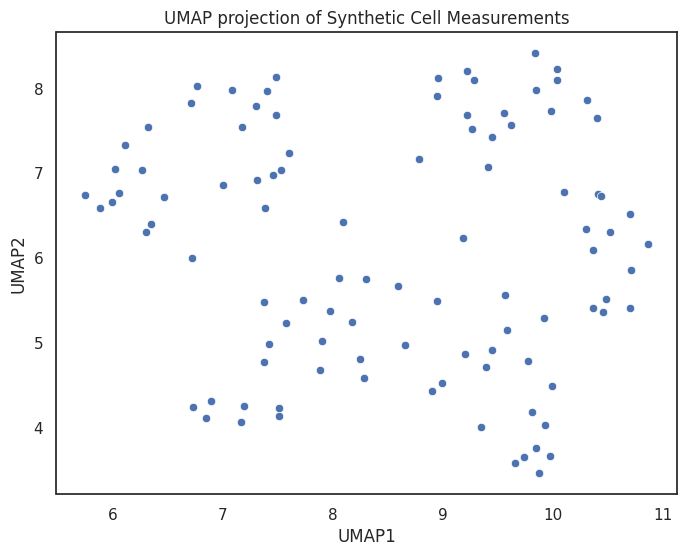

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

# UMAP plot
sns.set(style='white', rc={'figure.figsize':(8,6)})
plot = sns.scatterplot(x='UMAP1', y='UMAP2', data=data)
plt.title('UMAP projection of Synthetic Cell Measurements')

# Save the plot
plt.savefig('umap_projection.png')
plt.show()